In [1]:
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, but it won't ask you who you are because
# it remembers you. However, you will need to log in once per assignment.
from client.api.notebook import Notebook
ok = Notebook('hw2.ok')
# _ = ok.auth(inline=True)


Assignment: Hw2
OK, version v1.18.1



In [2]:
import numpy as np

1\. [3pts, 1pt each] **Create fake data**

**(A)** Let's start by creating some data that we can plot and manipulate. First, create a name `TR` and assign it the value `2`. Next, create an array with values ranging from 0 to 100 (excluding 100) and a step size that has the value stored in the name `TR`. Make sure the array is of dtype float64. Call it `time`.

In [3]:
# Create time
TR = 2
time = np.arange(0, 200, TR)
time = np.mgrid[0:200:TR]

time = time.astype('float64')

In [4]:
# This checks whether you have created the names that the autograder looks for. 
# Make sure this is true before submitting.
ok.grade("q2_1a")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'passed': 2, 'failed': 0, 'locked': 0}

In [5]:
# This is for later, when the homework is graded. Leave it commented out until then.
# ok.grade("q2_1a_full")

**(B)** Since some of the plotting we want to do involves two 1-D arrays, create a second array named `signal` that is the same length as `time` and has the values of $\cos(time/50)$. (Use the function `np.cos` for this.) We divide by 50 so that the signal wave changes slowly, which is more like an fMRI signal.

In [6]:
# Create signal
signal = np.cos(time / 50)

In [7]:
# This checks whether you have created the names that the autograder looks for. 
# Make sure this is true before submitting.
ok.grade("q2_1b")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



{'passed': 1, 'failed': 0, 'locked': 0}

In [8]:
# This is for later, when the homework is graded. Leave it commented out until then.
# ok.grade("q2_1b_full")

**(C)** To make the data look more like a realistic fMRI time course, let's add some measurement noise to this. Noise is just a (hopefully not too large) random change we add to our function. To do this, create an array of random numbers with the same shape as `signal`, using `np.random.randn`. Call this array `noise`.

Lastly, create an array called `timeseries` by adding `signal` and `noise` together.

In [9]:
# Create noise
noise = np.random.randn(signal.shape[0])

# Create timeseries
timeseries = signal + noise

In [10]:
# This checks whether you have created the names that the autograder looks for. 
# Make sure this is true before submitting.
ok.grade("q2_1c")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'passed': 2, 'failed': 0, 'locked': 0}

In [11]:
# This is for later, when the homework is graded. Leave it commented out until then.
# ok.grade("q2_1c_full")

2\. [1pts]  Assume that `time` is a *similar ordered* array that represents time, and `timeseries` is another *similar ordered* array that represents the value of an fMRI BOLD signal.

For the purposes of autograding, we've included a line of code that creates a figure using `plt.figure` and stores it in a name called `figure1`. Please keep this line in the cell below, otherwise you will miss points.

Make a line plot with `time` on the horizontal axis and `timeseries` on the vertical axis. Use `plt.xlabel` and `plt.ylabel` to label these axes 'Time (seconds)' and 'BOLD signal' respectively.

**Hint**: Don't forget to import matplotlib and set the appropriate settings telling Python to plot in this notebook!

Text(0, 0.5, 'BOLD signal')

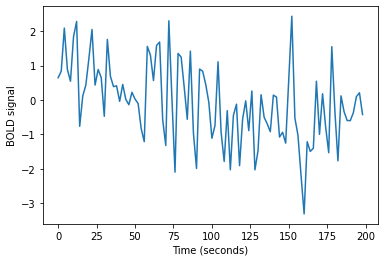

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

figure1 = plt.figure()
plt.plot(time, timeseries)
plt.xlabel('Time (seconds)')
plt.ylabel('BOLD signal')

3\. [1pt] We know `time` represents time, which is not interesting to look at, since it marches on, until our death. `timeseries` is what is really interesting in this data. As such, we might first assess how the values it contains are spread out, or distributed, by looking at its histogram. Create a histogram of the values of `timeseries` with 20 bins. 

We've also included a line for autograding here, please leave it.

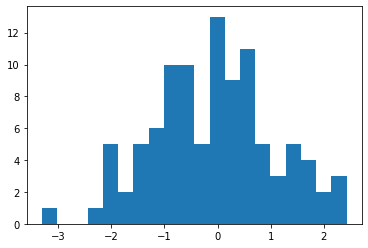

In [13]:
figure2 = plt.figure()
h = plt.hist(timeseries, bins=20)

4\. [3pts, 1pt each] Imagine you've just learned there was a bug with the scanner that was causing the data from two separate scans to be merged together into one file. The data from the first scan is in all the even numbered entries of the array, and the second scan is in the odd numbered entries.

**(A)** First select every other entry of `timeseries` using slicing to recover both of these two scans. Every other entry means that you need a step of size 2. Select the even-indexed numbers and store them in a name called  `even_timeseries` and select the odd-indexed numbers and store them in a name called `odd_timeseries`.

In [14]:
even_timeseries = timeseries[::2]
odd_timeseries = timeseries[1::2]

In [15]:
# This checks whether you have created the names that the autograder looks for. 
# Make sure this is true before submitting.
ok.grade("q2_4a")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'passed': 2, 'failed': 0, 'locked': 0}

In [16]:
# This is for later, when the homework is graded. Leave it commented out until then.
# ok.grade("q2_4a_full")

**(B)** Just like cars back in the 70s, the scanner needs to "warm up" before it runs well. This means that the first several volumes (or TRs) of every scan must be thrown away. Use **slicing** to create a new array from `even_timseries` that doesn't have the first 5 volumes. Call it `even_timeseries_clean`.

In [17]:
even_timeseries_clean = even_timeseries[5:]

In [18]:
# This checks whether you have created the names that the autograder looks for. 
# Make sure this is true before submitting.
ok.grade("q2_4b")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



{'passed': 1, 'failed': 0, 'locked': 0}

In [19]:
# This is for later, when the homework is graded. Leave it commented out until then.
# ok.grade("q2_4b_full")

**(C)** Finally use **indexing** to create a new array that contains those first 5 volumes, and call it `first_5`. 

In [20]:
first_5 = even_timeseries[[0,1,2,3,4]]

In [21]:
# This checks whether you have created the names that the autograder looks for. 
# Make sure this is true before submitting.
ok.grade("q2_4c")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



{'passed': 1, 'failed': 0, 'locked': 0}

In [22]:
# This is for later, when the homework is graded. Leave it commented out until then.
# ok.grade("q2_4c_full")

5\. [2pts] **Bar Plots**

**(A)** In the `even_timeseries` array, compute the mean value of the first 5 TRs and the mean of the remaining TRs using `np.mean`. Call them `mean_first_5` and `mean_remaining`, respectively. Store these two values in an array called `means`. 

In [23]:
mean_first_5 = np.mean(first_5)
mean_remaining = np.mean(even_timeseries_clean)

means = np.array([mean_first_5, mean_remaining])

In [24]:
# This checks whether you have created the names that the autograder looks for. 
# Make sure this is true before submitting.
ok.grade("q2_5a")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



{'passed': 3, 'failed': 0, 'locked': 0}

In [25]:
# This is for later, when the homework is graded. Leave it commented out until then.
# ok.grade("q2_5a_full")

**(B)** Make a bar plot of these two values and change the `xticks` of the first bar to say 'scan onset' and the second one to say 'rest of scan'.

We've also included a line for autograding here, please leave it.

([<matplotlib.axis.XTick at 0x7ff070db21c0>,
 [Text(0, 0, 'scan onset'), Text(1, 0, 'rest of scan')])

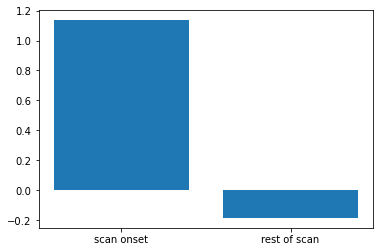

In [26]:
figure2 = plt.figure()
plt.bar([0, 1], means)
plt.xticks([0, 1], ['scan onset', 'rest of scan'])